# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The problem is to develop a ML model which will predict the salaries of new job postings. The model will learn from existing job postings data which has some features and the target variable which is the 'actual salary'. We also want to see which features has the highest impact on salary and which has the lowest impact.

In [1]:
%%time
#import your libraries
import pandas as pd
#import sklearn as sk
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#etc

#your info here
__author__ = "Nithin"
__email__ = "nithinr98@yahoo.com"

Wall time: 1.82 s


In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [3]:
#load the data into a Pandas dataframe
train_feature_df=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/train_features.csv')
test_feature_df=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/test_features.csv')
train_target_df=pd.read_csv('C:/Users/nnampoothiry/Desktop/Github/SalaryPrediction/salarypredictionportfolio/data/train_salaries.csv')

##### Examine the data

In [6]:
train_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [7]:
test_feature_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [8]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


In [9]:
train_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
test_feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [13]:
#Check for duplicated rows 
train_feature_df.duplicated().sum()

0

In [14]:
test_feature_df.duplicated().sum()

0

In [15]:
train_target_df.duplicated().sum()

0

In [15]:
train_feature_df.jobId.duplicated().any()

False

In [16]:
test_feature_df.jobId.duplicated().any()

False

In [17]:
train_target_df.jobId.duplicated().any()

False

##### Identify numerical and categorical variables seperately

In [12]:
train_feature_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [13]:
numeric_cols=['yearsExperience', 'milesFromMetropolis']
categorical_cols=['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

##### Summarize numeric and categorical variables seperately

In [14]:
train_feature_df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [20]:
train_feature_df.describe(include=['O'])

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685272370,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


##### Merge features and target into one master df

In [21]:
train_df=pd.merge(train_feature_df,train_target_df,on="jobId")

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [23]:
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


##### Visualize Salary data

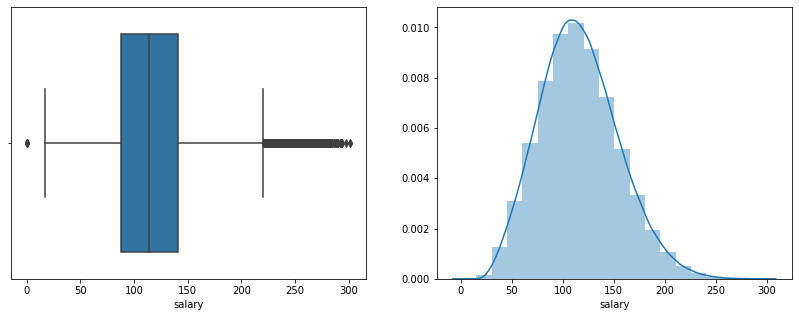

In [45]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)

plt.subplot(1,2,2)
sns.distplot(train_df.salary,bins=20)
plt.show()

In [39]:
train_df.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

##### Using IQR TO check outliers in the salary column

In [50]:
stat=train_df.salary.describe()
print(stat)
IQR=stat['75%']-stat['25%']
upper=stat['75%']+ 1.5*IQR
lower=stat['25%']- 1.5*IQR
print('The upper and lower bounds for suspected outliers are {} and {}'.format(upper,lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The upper and lower bounds for suspected outliers are 220.5 and 8.5


In [53]:
train_df.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137


##### Examine potential outliers

In [83]:
#Check potential outlier below lower bound
train_df[train_df.salary<8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [85]:
#Check potential outlier above upper bound
train_df.loc[train_df.salary > 222.5, 'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
JANITOR              0
Name: jobType, dtype: int64

In [86]:
# Check most suspicious potential outliers above upper bound
train_df[(train_df.salary > 222.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


These entries with zero salary do not appear to be volunteer positions. We are confident that they are instances of missing/corrupt data and should be removed from the training set.

The high-salary potential outliers all appear to be legitimate data. Most roles are C-level executive roles and the junior positions are in industries that are well known for high salaries (oil, finance). We determine these entries to be legitimate and will not remove them.

In [87]:
# Remove data with zero salaries
train_df = train_df[train_df.salary > 8.5]

In [88]:
def plot_feature(df,col):
    '''
    Make plot for featues
    Left, distribution of samples on features
    Right, dependancy of salary on the feature
    '''
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    
    if df[col].dtype=='int64':
        df[col].value_counts().sort_index().plot()
    else:
        #Change the categorical feature to category type and order their lvel by mean salary
        #in each category
        mean=df.groupby(col)['salary'].mean()
        df[col]=df[col].astype('category')
        levels=mean.sort_values().index.to_list()
        df[col].cat.reorder_categories(levels,inplace=True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    
    plt.subplot(1,2,2)
    
    if df[col].dtype=='int64' or col =='companyId':
        #Plot the mean salary for each category and fill between the (mean-std , mean+std)
        mean=df.groupby(col)['salary'].mean()
        std=df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values+std.values,alpha=0.1)
        
    else:
        sns.boxplot(x=col,y='salary',data=df)
        
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()
    
            

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


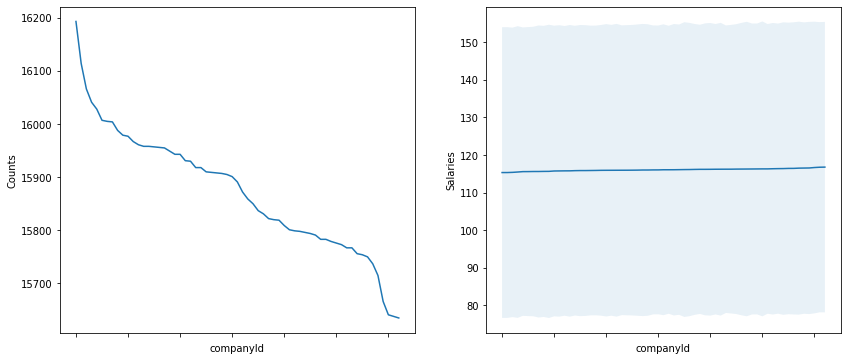

In [89]:
plot_feature(train_df,'companyId')

##### The salary is weakly associated with company ID

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


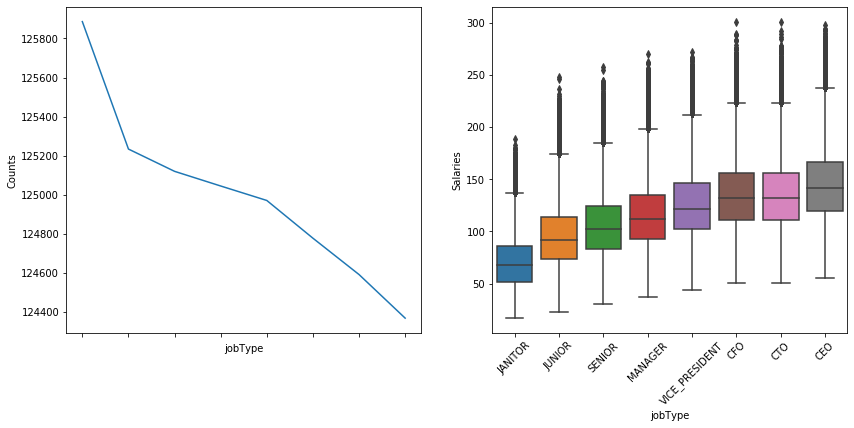

In [90]:
plot_feature(train_df,'jobType')

##### There is a clear positive correlation between job type and salary

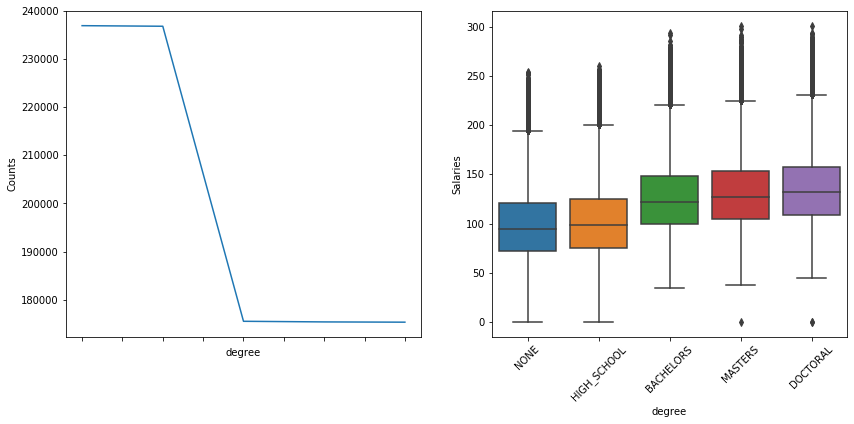

In [80]:
plot_feature(train_df,'degree')

##### More advanced degrees correspond to higher salaries

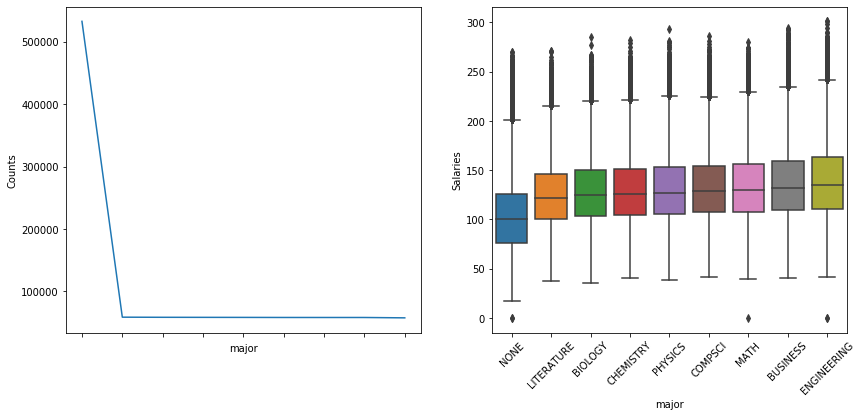

In [81]:
plot_feature(train_df,'major')

##### People with majors of engineering, business and math generally have higher salaries.

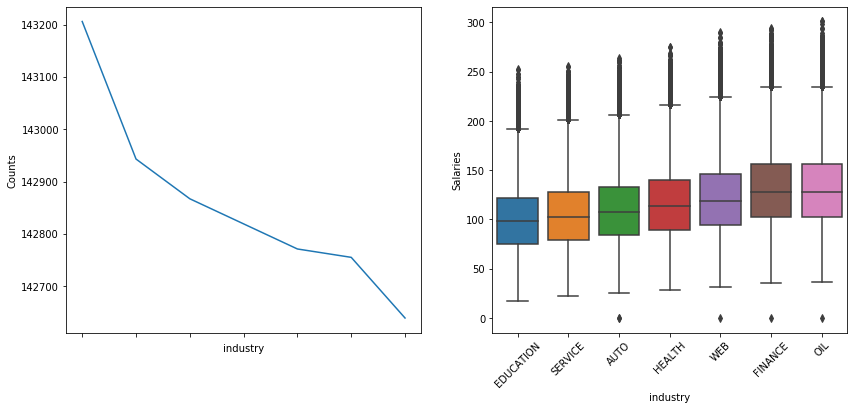

In [82]:
plot_feature(train_df,'industry')

##### Industries oil,finance and web generally pay better

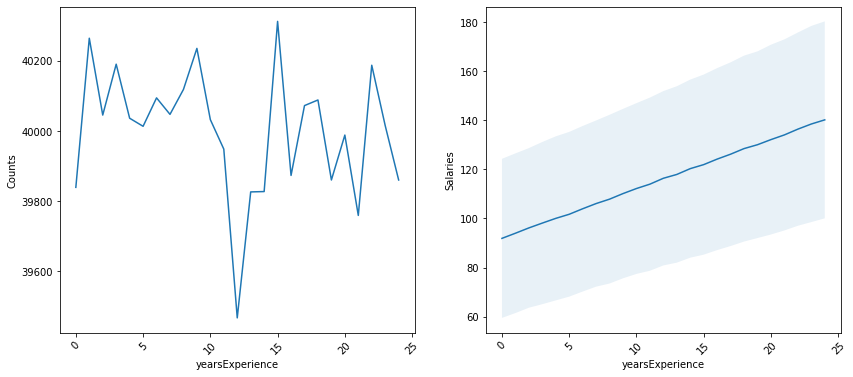

In [91]:
plot_feature(train_df, 'yearsExperience')

##### In general, there is a clear correlation between salary and years of experience.

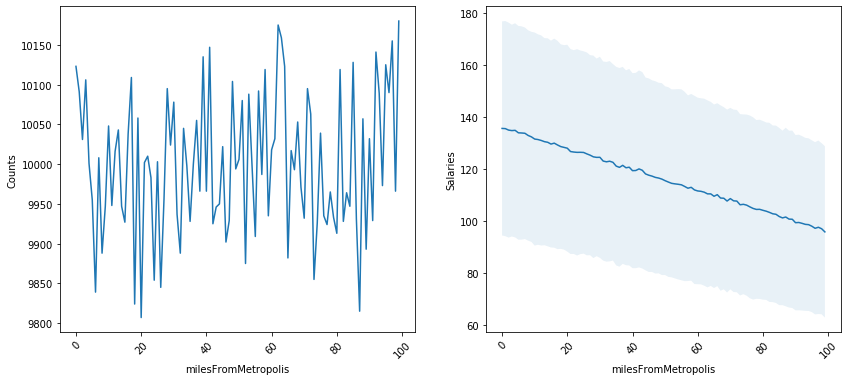

In [92]:
plot_feature(train_df, 'milesFromMetropolis')

##### In general, salaries decrease with the distance to metropolis.

In [98]:
train_df.industry.dtype.name

'category'

In [102]:
train_df.industry.cat.categories.tolist()

['EDUCATION', 'SERVICE', 'AUTO', 'HEALTH', 'WEB', 'FINANCE', 'OIL']

In [105]:
cats1={}
cats1['car']=45
cats1

{'car': 45}

In [123]:
def encode_label(df, col):
    #encode the categories using average salary for each category to replace label
    cat_dict ={}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()   
    df[col] = df[col].map(cat_dict)

In [124]:
for col in train_df.columns:
    if train_df[col].dtype.name == "category":
        encode_label(train_df, col)

In [114]:
train_df.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,115.345049,135.458547,130.505647,133.322042,115.735540,10,83,130
1,JOB1362684407688,115.756548,145.311425,101.921085,102.583864,121.645362,3,73,101
2,JOB1362684407689,116.224249,125.368630,135.490979,130.372436,115.735540,10,38,137
3,JOB1362684407690,116.199380,115.368518,135.490979,129.072085,109.435222,8,17,142
4,JOB1362684407691,115.888501,125.368630,125.454663,130.372436,130.747659,8,16,163


In [121]:
#list(train_df.columns)

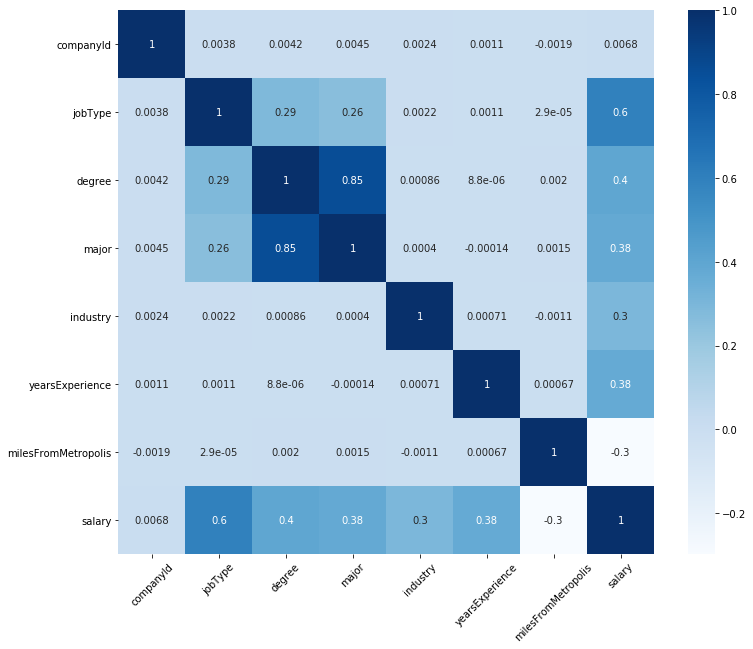

In [127]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
train_df[features] = train_df[features].astype(np.int64)
sns.heatmap(train_df[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

### ---- Model Building ----

In [6]:
train_feature_df.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38


In [7]:
train_target_df.head(3)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137


In [8]:
test_feature_df.head(3)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9


In [4]:
combined_train_target_raw=pd.merge(train_feature_df,train_target_df,on='jobId',how='inner')
                                 

In [5]:
combined_train_target_raw.head(5)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [6]:
combined_train_target_raw=combined_train_target_raw.drop_duplicates(subset=['jobId'])
combined_train_target_raw=combined_train_target_raw.loc[(combined_train_target_raw.salary>8.5)]
combined_train_target_raw=shuffle(combined_train_target_raw).reset_index(drop=True)

In [7]:
combined_train_target_raw.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684901685,COMP42,JUNIOR,MASTERS,COMPSCI,OIL,7,44,109
1,JOB1362684500474,COMP3,CFO,BACHELORS,LITERATURE,WEB,20,32,165
2,JOB1362684762574,COMP14,JUNIOR,MASTERS,COMPSCI,WEB,19,85,90
3,JOB1362685326136,COMP52,CTO,HIGH_SCHOOL,NONE,HEALTH,21,31,126
4,JOB1362684533582,COMP33,CFO,HIGH_SCHOOL,NONE,WEB,15,47,142
5,JOB1362684852822,COMP38,CEO,HIGH_SCHOOL,NONE,SERVICE,5,72,101
6,JOB1362685232022,COMP32,SENIOR,NONE,NONE,AUTO,8,19,78
7,JOB1362684670525,COMP26,CEO,MASTERS,ENGINEERING,FINANCE,10,82,202
8,JOB1362685160558,COMP39,MANAGER,MASTERS,NONE,OIL,20,36,177
9,JOB1362684490085,COMP11,CEO,HIGH_SCHOOL,NONE,WEB,6,96,147


In [8]:
combined_train_target_raw.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [12]:
#numerical columns
'''num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])
'''

"num_pipeline=Pipeline([\n    ('imputer',SimpleImputer(strategy='median')),\n    ('std_scaler',StandardScaler())\n])\n"

In [13]:
combined_train_target_raw.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [14]:
combined_train_target_raw.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [15]:
cat_vars=[ 'companyId', 'jobType', 'degree', 'major', 'industry']
num_vars=['yearsExperience', 'milesFromMetropolis']

In [16]:
#Encode training data set
cat_vars_train=pd.get_dummies(combined_train_target_raw[cat_vars])
num_vars_train=combined_train_target_raw[num_vars].apply(pd.to_numeric)
training_df=pd.concat([cat_vars_train,num_vars_train],axis=1)

In [43]:
#training_df.isnull().sum()

In [18]:
#Target
target_df=combined_train_target_raw[['salary']]

In [19]:
#target_df.head(5)

In [44]:
#Encode test data set
cat_vars_test=pd.get_dummies(test_feature_df[cat_vars])
num_vars_test=combined_train_target_raw[num_vars].apply(pd.to_numeric)
test_df=pd.concat([cat_vars_test,num_vars_test],axis=1)

In [47]:
test_df1=test_df.dropna()

In [48]:
test_df1.isnull().sum()

companyId_COMP0        0
companyId_COMP1        0
companyId_COMP10       0
companyId_COMP11       0
companyId_COMP12       0
                      ..
industry_OIL           0
industry_SERVICE       0
industry_WEB           0
yearsExperience        0
milesFromMetropolis    0
Length: 94, dtype: int64

In [22]:
#cleaned_training_df.head(5)

In [38]:
#Categorical Columns
#from sklearn.compose import ColumnTransformer

In [39]:
#num_attribs=list(salary_train_num)
#cat_attribs=list(salary_train[['jobType', 'degree', 'major', 'industry']])

In [40]:
'''
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs),
])
'''

In [41]:
#salary_train_prepared=full_pipeline.fit_transform(salary_train)

In [33]:
#salary_train_prepared.dtype

In [34]:
#salary_train_prepared # Now Go to the linear regression step to see this being used

In [44]:
#sal_to_array=salary_train_prepared.toarray()

### ---- 5 Establish a baseline ----

In [49]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

In [36]:
dummy_regr=DummyRegressor(strategy='mean')

In [66]:
#dummy_model=dummy_regr.fit(training_df,target_df)

In [40]:
scores=cross_val_score(dummy_regr,training_df,target_df,scoring="neg_mean_squared_error",cv=5)

In [41]:
averageModel_rmse_scores=np.sqrt(-scores)

In [42]:
averageModel_rmse_scores

array([38.77288767, 38.66649599, 38.72542999, 38.67791064, 38.74291492])

In [43]:
def display_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard Deviation:",scores.std())

In [44]:
display_scores(averageModel_rmse_scores)

Scores: [38.77288767 38.66649599 38.72542999 38.67791064 38.74291492]
Mean: 38.71712784104625
Standard Deviation: 0.039861338030993246


In [45]:
#MSE --to be used before rmse scores
from sklearn.metrics import mean_squared_error

In [61]:
salary_predictions=dummy_regr.predict(training_df)

In [62]:
averageModel_mse=mean_squared_error(salary_column,salary_predictions)

In [63]:
averageModel_rmse=np.sqrt(averageModel_mse)

In [64]:
averageModel_rmse

38.71704723335872

### ---- 6 Hypothesize solution ----

In [65]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [66]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

##### Cross validation

In [21]:
lr=LinearRegression()

In [22]:
training_df.isnull().sum()

companyId_COMP0        0
companyId_COMP1        0
companyId_COMP10       0
companyId_COMP11       0
companyId_COMP12       0
                      ..
industry_OIL           0
industry_SERVICE       0
industry_WEB           0
yearsExperience        0
milesFromMetropolis    0
Length: 94, dtype: int64

In [23]:
lin_score=cross_val_score(lr,training_df,target_df,n_jobs=2,scoring="neg_mean_squared_error",cv=2)

In [24]:
lr_mean_mse=round(-1.0*np.mean(lin_score),2)

In [25]:
lr_mean_mse

384.45

In [26]:
np.std(lin_score)

0.18391811426462823

##### Random forest

In [29]:
rf=RandomForestRegressor(n_estimators=150, n_jobs=2, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=0)

In [30]:
%%time
rf_score=cross_val_score(rf,training_df,target_df,n_jobs=2,scoring="neg_mean_squared_error",cv=2)

Wall time: 9min 1s


In [32]:
rf_mean_mse=round(-1.0*np.mean(rf_score),2)
rf_mean_mse

367.51

In [34]:
np.std(rf_score)

0.02183005489675338

##### Gradient boosting

In [35]:
gbm = GradientBoostingRegressor(n_estimators=150, max_depth=5, loss='ls', verbose=0)

In [36]:
%%time
gbm_score=cross_val_score(gbm,training_df,target_df,n_jobs=2,scoring="neg_mean_squared_error",cv=2)

Wall time: 9min 9s


In [37]:
gbm_mean_mse=round(-1*np.mean(gbm_score),2)
gbm_mean_mse

357.1

In [38]:
np.std(gbm_score)

0.15013549658252145

In [39]:
print(gbm)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


### ---- 10 Select best model  ----

##### GBM came up with the lowest mse and we now fit the entire training set and train the model

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

In [40]:
%%time
gbm.fit(training_df,target_df.values.ravel())

C:\Users\nnampoothiry\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Wall time: 13min 52s


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### Create predictions based on test data

In [49]:
predictions=gbm.predict(test_df1)

##### Feature Importances

In [55]:
importances=gbm.feature_importances_
feature_importances=pd.DataFrame({'feature':training_df.columns,'importance':importances})
feature_importances.sort_values(by='importance',ascending=False,inplace=True)
#Set index to 'feature'
feature_importances.set_index('feature',inplace=True,drop=True)

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [76]:
with open('model.txt', 'w') as file:
    file.write(str(gbm))
    file.write("\n")
    file.write("Mean MSE=")
    file.write(str(gbm_mean_mse))
               
    feature_importances.to_csv('feature_importances.csv') 
    np.savetxt('predictions.csv', predictions, delimiter=',')   

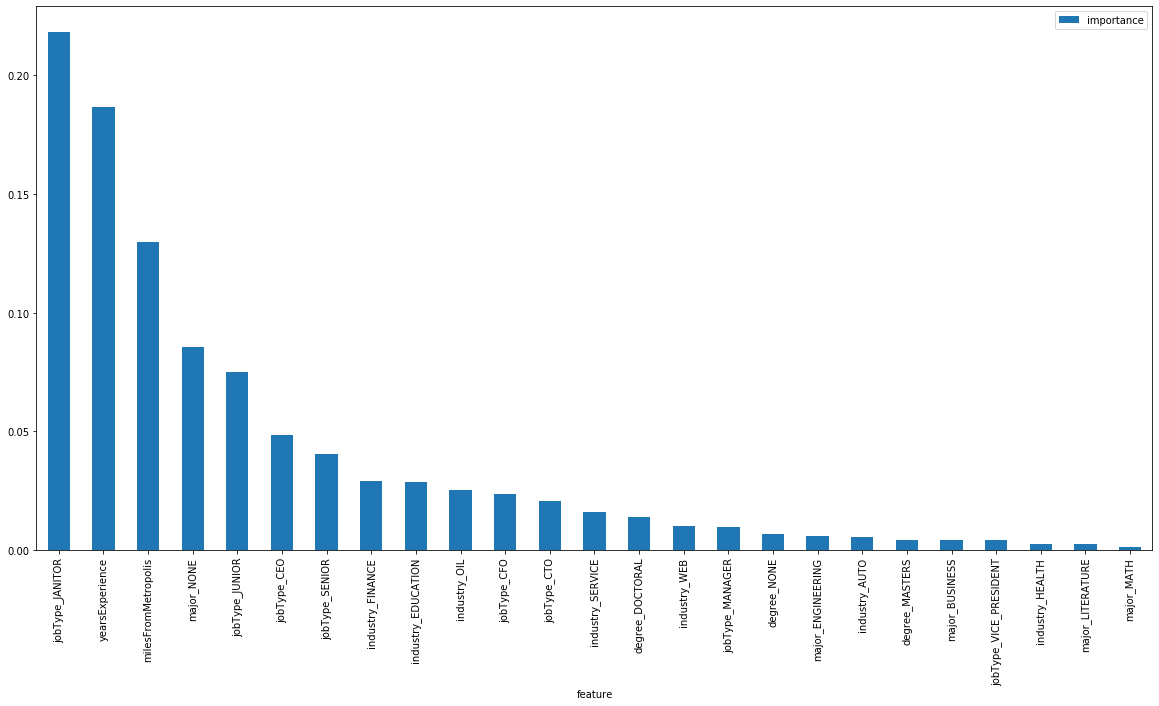

In [63]:
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data